##Nombre: WLADIMIR ANDRES CARRILLO MOSCOSO
##Materia: Recuperación de Información GR1CC
##Fecha: 13/05/2025

# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
# Documentos del corpus

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
documents

['El gato se escondió debajo de la cama.',
 'La cama estaba limpia y cómoda.',
 'El perro y el gato jugaron en el jardín.',
 'La limpieza del jardín es importante.']

In [2]:
# Impresion de palabras en documentos

for doc in documents:
    for palabra in doc.split():
        print(palabra)

El
gato
se
escondió
debajo
de
la
cama.
La
cama
estaba
limpia
y
cómoda.
El
perro
y
el
gato
jugaron
en
el
jardín.
La
limpieza
del
jardín
es
importante.


In [3]:
# Uso de sep en split()

for doc in documents:
    for palabra in doc.split(sep=" "):
        print(palabra)

El
gato
se
escondió
debajo
de
la
cama.
La
cama
estaba
limpia
y
cómoda.
El
perro
y
el
gato
jugaron
en
el
jardín.
La
limpieza
del
jardín
es
importante.


In [4]:
# Creacion de set vocab y adicion de palabras sin repeticiones

vocab = set()
for doc in documents:
    for palabra in doc.split():
        vocab.add(palabra)
    print(vocab)

{'debajo', 'cama.', 'El', 'de', 'gato', 'la', 'escondió', 'se'}
{'debajo', 'limpia', 'estaba', 'cama.', 'El', 'de', 'y', 'gato', 'la', 'cama', 'La', 'escondió', 'se', 'cómoda.'}
{'limpia', 'la', 'cama', 'estaba', 'debajo', 'cama.', 'de', 'y', 'jardín.', 'el', 'La', 'se', 'perro', 'El', 'jugaron', 'gato', 'cómoda.', 'en', 'escondió'}
{'limpia', 'jardín', 'la', 'cama', 'es', 'estaba', 'debajo', 'cama.', 'de', 'y', 'jardín.', 'limpieza', 'el', 'La', 'del', 'se', 'importante.', 'perro', 'El', 'jugaron', 'gato', 'cómoda.', 'en', 'escondió'}


In [5]:
# Uso de lower() para convertir a minúsculas

documents[0].lower()

'el gato se escondió debajo de la cama.'

In [6]:
# Mostrar en pantalla el tamaño de vocab

vocab = set()
for doc in documents:
    for palabra in doc.lower().strip('.').split():
        vocab.add(palabra)
print(len(vocab))

20


In [7]:
# Mostrar en pantalla le contenido de vocab

vocab = set()
for doc in documents:
    for palabra in doc.lower().strip('.').split():
        vocab.add(palabra)
print(vocab)

{'limpia', 'jardín', 'la', 'cama', 'es', 'estaba', 'debajo', 'de', 'y', 'limpieza', 'el', 'importante', 'del', 'se', 'perro', 'jugaron', 'cómoda', 'gato', 'en', 'escondió'}


In [8]:
# Mostrar en pantalla el término junto con el documento en el que se encuentra

for doc in documents:
  for term in vocab:
    if term in doc:
      print(term, doc)

la El gato se escondió debajo de la cama.
cama El gato se escondió debajo de la cama.
es El gato se escondió debajo de la cama.
debajo El gato se escondió debajo de la cama.
de El gato se escondió debajo de la cama.
se El gato se escondió debajo de la cama.
gato El gato se escondió debajo de la cama.
escondió El gato se escondió debajo de la cama.
limpia La cama estaba limpia y cómoda.
cama La cama estaba limpia y cómoda.
es La cama estaba limpia y cómoda.
estaba La cama estaba limpia y cómoda.
y La cama estaba limpia y cómoda.
cómoda La cama estaba limpia y cómoda.
jardín El perro y el gato jugaron en el jardín.
y El perro y el gato jugaron en el jardín.
el El perro y el gato jugaron en el jardín.
perro El perro y el gato jugaron en el jardín.
jugaron El perro y el gato jugaron en el jardín.
gato El perro y el gato jugaron en el jardín.
en El perro y el gato jugaron en el jardín.
jardín La limpieza del jardín es importante.
es La limpieza del jardín es importante.
de La limpieza del j

In [9]:
# Mostrar en pantalla el término, las veces que aparece en cada documento y el documento al que pertenete

for doc in documents:
  for term in vocab:
    count = doc.lower().strip('.').count(term)
    print(term, count, doc)

limpia 0 El gato se escondió debajo de la cama.
jardín 0 El gato se escondió debajo de la cama.
la 1 El gato se escondió debajo de la cama.
cama 1 El gato se escondió debajo de la cama.
es 1 El gato se escondió debajo de la cama.
estaba 0 El gato se escondió debajo de la cama.
debajo 1 El gato se escondió debajo de la cama.
de 2 El gato se escondió debajo de la cama.
y 0 El gato se escondió debajo de la cama.
limpieza 0 El gato se escondió debajo de la cama.
el 1 El gato se escondió debajo de la cama.
importante 0 El gato se escondió debajo de la cama.
del 0 El gato se escondió debajo de la cama.
se 1 El gato se escondió debajo de la cama.
perro 0 El gato se escondió debajo de la cama.
jugaron 0 El gato se escondió debajo de la cama.
cómoda 0 El gato se escondió debajo de la cama.
gato 1 El gato se escondió debajo de la cama.
en 0 El gato se escondió debajo de la cama.
escondió 1 El gato se escondió debajo de la cama.
limpia 1 La cama estaba limpia y cómoda.
jardín 0 La cama estaba lim

In [10]:
# Crea un diccionario que tendrá la frecuencia de los términos en cada documento y se muestra en pantalla

docs_tf = {}
i = 0

for doc in documents:
    dict_tf = {}
    for term in vocab:
        count = doc.lower().strip('.').count(term)
        dict_tf[term] = count
    print(doc, dict_tf)
    docs_tf[i+1] = dict_tf
    i += 1

print(docs_tf)

El gato se escondió debajo de la cama. {'limpia': 0, 'jardín': 0, 'la': 1, 'cama': 1, 'es': 1, 'estaba': 0, 'debajo': 1, 'de': 2, 'y': 0, 'limpieza': 0, 'el': 1, 'importante': 0, 'del': 0, 'se': 1, 'perro': 0, 'jugaron': 0, 'cómoda': 0, 'gato': 1, 'en': 0, 'escondió': 1}
La cama estaba limpia y cómoda. {'limpia': 1, 'jardín': 0, 'la': 1, 'cama': 1, 'es': 1, 'estaba': 1, 'debajo': 0, 'de': 0, 'y': 1, 'limpieza': 0, 'el': 0, 'importante': 0, 'del': 0, 'se': 0, 'perro': 0, 'jugaron': 0, 'cómoda': 1, 'gato': 0, 'en': 0, 'escondió': 0}
El perro y el gato jugaron en el jardín. {'limpia': 0, 'jardín': 1, 'la': 0, 'cama': 0, 'es': 0, 'estaba': 0, 'debajo': 0, 'de': 0, 'y': 1, 'limpieza': 0, 'el': 3, 'importante': 0, 'del': 0, 'se': 0, 'perro': 1, 'jugaron': 1, 'cómoda': 0, 'gato': 1, 'en': 1, 'escondió': 0}
La limpieza del jardín es importante. {'limpia': 0, 'jardín': 1, 'la': 1, 'cama': 0, 'es': 1, 'estaba': 0, 'debajo': 0, 'de': 1, 'y': 0, 'limpieza': 1, 'el': 1, 'importante': 1, 'del': 1, '

In [11]:
# Se importa pandas para crear la matriz

import pandas as pd

In [12]:
# Se crea la matriz y se a imprime

matriz = pd.DataFrame(docs_tf)
matriz

,1,2,3,4
limpia,0,1,0,0
jardín,0,0,1,1
la,1,1,0,1
cama,1,1,0,0
es,1,1,0,1
estaba,0,1,0,0
debajo,1,0,0,0
de,2,0,0,1
y,0,1,1,0
limpieza,0,0,0,1


In [13]:
# Se guarda la matriz en un archivo .csv

matriz.to_csv('matriz.csv', index=True)

In [14]:
# Impresión de la matriz transpuesta para poder tener la visualizacion en 2d

matriz.T

,limpia,jardín,la,cama,es,estaba,debajo,de,y,limpieza,el,importante,del,se,perro,jugaron,cómoda,gato,en,escondió
1,0,0,1,1,1,0,1,2,0,0,1,0,0,1,0,0,0,1,0,1
2,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,3,0,0,0,1,1,0,1,1,0
4,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0


In [15]:
from sklearn.decomposition import PCA

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449,  1.73739882],
       [-1.35204195, -1.83917526],
       [ 2.79812836, -0.18141402],
       [-0.36680192,  0.28319046]])

In [16]:
import matplotlib.pyplot as plt

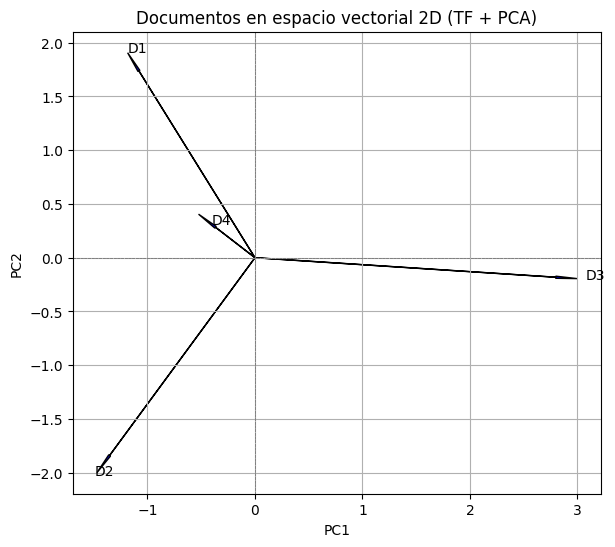

In [17]:
# Gráfica en 2d de la reducción PCA

plt.figure(figsize=(10, 6))
for i, (x,y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.2, fc='blue', ec='k')
  plt.text(x * 1.1, y=y * 1.1, s=f'D{i+1}', fontsize=10)

  plt.title("Documentos en espacio vectorial 2D (TF + PCA)")
  plt.xlabel("PC1")
  plt.ylabel("PC2")

  plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
  plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.grid(True)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

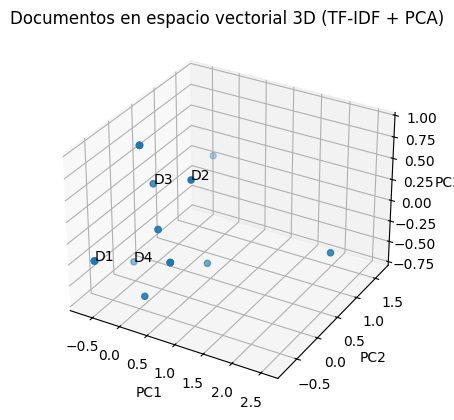

In [19]:
# Visualización 3D con PCA
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)
ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Consulta
consulta = "gato"

In [21]:
# Preprocesar y vectorizar la consulta
consulta = consulta.lower().strip('.').split()
consulta_vector = [consulta.count(term) for term in matriz.index]
consulta_vector = np.array(consulta_vector).reshape(1, -1)

In [22]:
# Calcular similitud coseno
similitudes = cosine_similarity(consulta_vector, matriz.T.values)[0]
print("\nSimilitudes coseno con cada documento:")
for i, sim in enumerate(similitudes):
    print(f"Documento {i+1}: {sim:.4f}")


Similitudes coseno con cada documento:
Documento 1: 0.2887
Documento 2: 0.0000
Documento 3: 0.2582
Documento 4: 0.0000


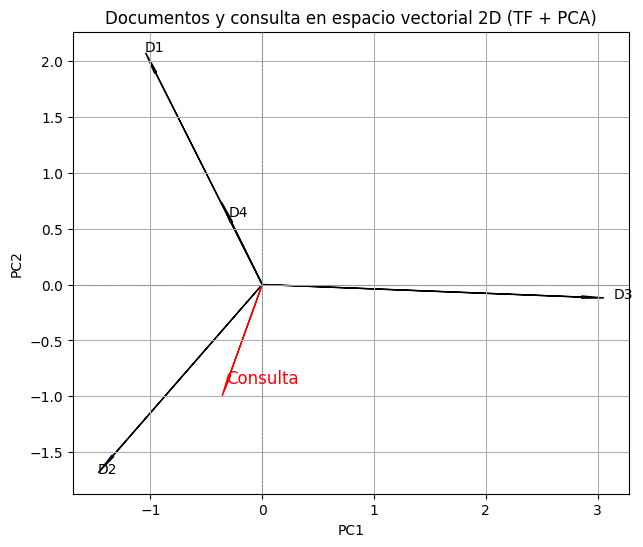

In [23]:
# Visualizar con PCA
# Agregar la consulta a la matriz
matriz_ext = matriz.copy()
matriz_ext['consulta'] = consulta_vector.flatten()

# PCA (reducción a 2D)
pca = PCA(n_components=2)
docs_2d_ext = pca.fit_transform(matriz_ext.T)

# Separar documentos y consulta
doc_coords = docs_2d_ext[:-1]
query_coord = docs_2d_ext[-1]

# Visualizar
plt.figure(figsize=(10, 6))

# Documentos
for i, (x, y) in enumerate(doc_coords):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.2, fc='blue', ec='k')
    plt.text(x * 1.1, y * 1.1, s=f'D{i+1}', fontsize=10)

# Consulta
qx, qy = query_coord
plt.arrow(0, 0, qx, qy, head_width=0.02, head_length=0.2, fc='red', ec='red')
plt.text(qx * 1.1, qy * 1.1, s='Consulta', fontsize=12, color='red')

# Estética
plt.title("Documentos y consulta en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [26]:
# Función: consulta y ranking por similitud coseno

def consulta_similitud(consulta, matriz_tf, top_n=4, plot=True):
    # Preprocesamiento simple
    consulta = consulta.lower().strip('.').split()
    consulta_vector = np.array([
        consulta.count(term)
        for term in matriz_tf.index
    ]).reshape(1, -1)

    # Similitud coseno
    similitudes = cosine_similarity(consulta_vector, matriz_tf.T.values)[0]

    # Ranking
    doc_ids = matriz_tf.columns
    ranking = sorted(
        zip(doc_ids, similitudes),
        key=lambda x: x[1],
        reverse=True
    )

    print("Ranking de documentos más relevantes:")
    for doc_id, score in ranking[:top_n]:
        print(f"Documento {doc_id}: Similitud = {score:.4f}")

    if plot:
        # Visualización PCA
        matriz_ext = matriz_tf.copy()
        matriz_ext['consulta'] = consulta_vector.flatten()

        pca = PCA(n_components=2)
        coords_2d = pca.fit_transform(matriz_ext.T)

        # Vectores
        plt.figure(figsize=(10, 6))
        for i, (x, y) in enumerate(coords_2d[:-1]):
            plt.arrow(
                0, 0, x, y,
                head_width=0.02,
                head_length=0.2,
                fc='blue',
                ec='k'
            )
            plt.text(
                x * 1.1, y * 1.1,
                s=f'D{doc_ids[i]}',
                fontsize=10
            )

        # Consulta
        qx, qy = coords_2d[-1]
        plt.arrow(
            0, 0, qx, qy,
            head_width=0.02,
            head_length=0.2,
            fc='red',
            ec='red'
        )
        plt.text(
            qx * 1.1, qy * 1.1,
            s='Consulta',
            fontsize=12,
            color='red'
        )

        # Estética
        plt.title("Consulta y documentos en espacio vectorial 2D (TF + PCA)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return ranking

Ranking de documentos más relevantes:
Documento 1: Similitud = 0.2887
Documento 3: Similitud = 0.2582
Documento 2: Similitud = 0.0000
Documento 4: Similitud = 0.0000


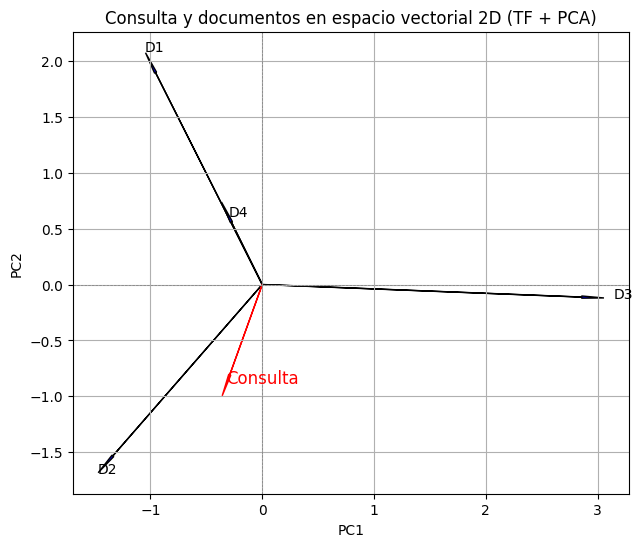

In [27]:
consulta = "gato duerme"
ranking = consulta_similitud(consulta, matriz, top_n=4)